In [3]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cal_weather = pd.read_csv('cal_weather.csv')

In [5]:
cal = pd.read_csv('cal.csv')

In [6]:
cal_weather.describe()

,Severity,Start_Lat,Start_Lng,Temperature(F),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,663204.000000,663204.000000,663204.000000,648079.000000,651962.000000,650008.000000,534398.000000,195589.000000
mean,2.337331,35.504755,-119.478862,65.681507,29.850822,9.167930,7.446220,0.008646
std,0.493503,2.024029,1.955176,12.472955,0.478655,2.234368,5.899021,0.066014
min,1.000000,32.542587,-124.367607,-29.900000,0.300000,0.000000,0.000000,0.000000
25%,2.000000,33.953853,-121.686463,57.000000,29.840000,10.000000,4.600000,0.000000
50%,2.000000,34.156670,-118.371122,64.400000,29.940000,10.000000,6.900000,0.000000
75%,3.000000,37.688770,-117.926880,73.400000,30.030000,10.000000,10.000000,0.000000
max,4.000000,42.005278,-114.481224,127.400000,33.040000,140.000000,822.800000,24.000000


In [8]:
weather_conditions = cal.groupby('Weather_Condition').count().sort_values('Start_Lat', ascending=False).head(10)
weather_conditions = weather_conditions.reset_index()
weather_conditions

,Weather_Condition,Unnamed: 0,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,State,Zipcode,Temperature(F)
0,Clear,253070,253070,253070,253070,253070,253070,253067,253070,253070,253070,251762
1,Fair,103016,103016,103016,103016,103016,103016,103015,103016,103016,103016,102205
2,Mostly Cloudy,60440,60440,60440,60440,60440,60440,60440,60440,60440,60440,59999
3,Partly Cloudy,59555,59555,59555,59555,59555,59555,59554,59555,59555,59555,59109
4,Overcast,58472,58472,58472,58472,58472,58472,58472,58472,58472,58472,58173
5,Scattered Clouds,29356,29356,29356,29356,29356,29356,29356,29356,29356,29356,29182
6,Cloudy,24959,24959,24959,24959,24959,24959,24959,24959,24959,24959,24787
7,Haze,21830,21830,21830,21830,21830,21830,21830,21830,21830,21830,21641
8,Light Rain,20437,20437,20437,20437,20437,20437,20437,20437,20437,20437,20252
9,Rain,6438,6438,6438,6438,6438,6438,6438,6438,6438,6438,6360


Text(0.5, 1.0, 'Accident Count vs. Top 10 Weather Conditions')

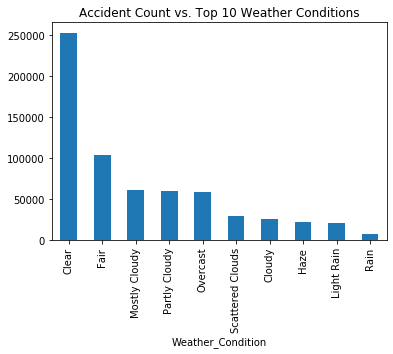

In [9]:
weather_fig = weather_conditions.plot.bar('Weather_Condition', 'Start_Lat', legend=False)
weather_fig.set_title("Accident Count vs. Top 10 Weather Conditions")

Text(0.5, 1.0, 'California Temperature vs. Number of Accidents')

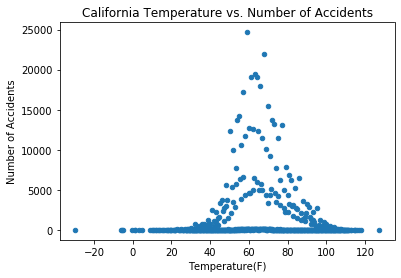

In [29]:
temp_group = cal_weather.groupby('Temperature(F)').count().reset_index()
temp_fig = temp_group.plot.scatter("Temperature(F)", "Start_Time")
temp_fig.set_ylabel("Number of Accidents")
temp_fig.set_title("California Temperature vs. Number of Accidents")

In [31]:
sc = cal[cal['County'] == 'Santa Clara']
sc_temp = sc.groupby('Temperature(F)').count().reset_index()
sc_sev = sc.groupby('Temperature(F)').mean().reset_index()

In [32]:
la = cal[cal['County'] == 'Los Angeles']
la_temp = la.groupby('Temperature(F)').count().reset_index()
la_sev = la.groupby('Temperature(F)').mean().reset_index()

Text(0.5, 1.0, 'Santa Clara County Number of Accidents vs. Temperature')

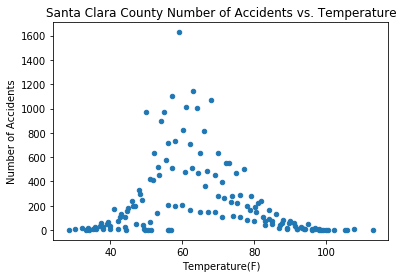

In [35]:
sc_temp_fig = sc_temp.plot.scatter("Temperature(F)", "Start_Time")
sc_temp_fig.set_ylabel("Number of Accidents")
sc_temp_fig.set_title("Santa Clara County Number of Accidents vs. Temperature")

Text(0.5, 1.0, 'Los Angeles County Number of Accidents vs. Temperature')

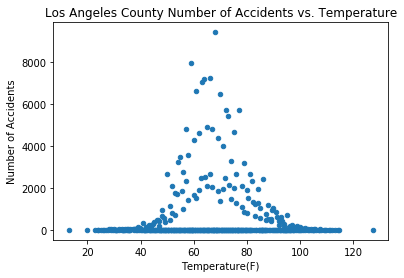

In [37]:
la_temp_fig = la_temp.plot.scatter("Temperature(F)", "Start_Time")
la_temp_fig.set_ylabel("Number of Accidents")
la_temp_fig.set_title("Los Angeles County Number of Accidents vs. Temperature")

Text(0.5, 1.0, 'California Accident Severity vs. Temperature')

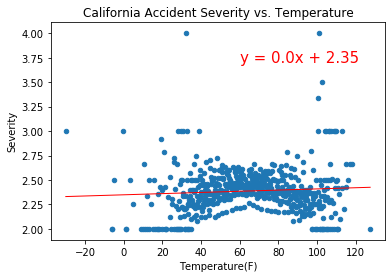

In [56]:
sev_group = cal.groupby('Temperature(F)').mean().reset_index()
sg_slope, sg_int, sg_r, sg_p, sg_std_err = st.linregress(sev_group['Temperature(F)'], sev_group['Severity'])
sg_fit = sg_slope * sev_group['Temperature(F)'] + sg_int
sev_fig = sev_group.plot.scatter("Temperature(F)", "Severity")
sev_fig.plot(sev_group['Temperature(F)'], sg_fit, 'r', linewidth=1)
sev_line_eq = "y = " + str(round(sg_slope,2)) + "x + " + str(round(sg_int,2))
sev_fig.annotate(sev_line_eq,(60, 3.7),fontsize=15,color="red")
sev_fig.set_title("California Accident Severity vs. Temperature")

Text(60, 2.8, 'y = 0.0x + 2.23')

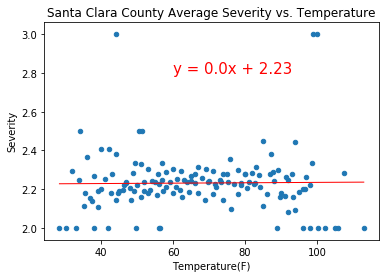

In [48]:
scs_slope, scs_int, scs_r, scs_p, scs_std_err = st.linregress(sc_sev['Temperature(F)'], sc_sev['Severity'])
scs_fit = scs_slope * sc_sev['Temperature(F)'] + scs_int
sc_sev_fig = sc_sev.plot.scatter("Temperature(F)", "Severity")
sc_sev_fig.plot(sc_sev['Temperature(F)'], scs_fit, 'r', linewidth=1)
sc_sev_fig.set_title("Santa Clara County Average Severity vs. Temperature")
sc_line_eq = "y = " + str(round(scs_slope,2)) + "x + " + str(round(scs_int,2))
sc_sev_fig.annotate(sc_line_eq,(60, 2.8),fontsize=15,color="red")

Text(60, 3.7, 'y = -0.0x + 2.35')

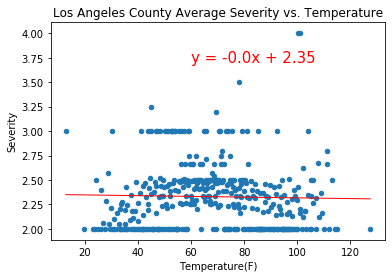

In [52]:
las_slope, las_int, las_r, las_p, las_std_err = st.linregress(la_sev['Temperature(F)'], la_sev['Severity'])
las_fit = las_slope * la_sev['Temperature(F)'] + las_int
la_sev_fig = la_sev.plot.scatter("Temperature(F)", "Severity")
la_sev_fig.plot(la_sev['Temperature(F)'], las_fit, 'r', linewidth=1)
la_sev_fig.set_title("Los Angeles County Average Severity vs. Temperature")
la_line_eq = "y = " + str(round(las_slope,2)) + "x + " + str(round(las_int,2))
la_sev_fig.annotate(la_line_eq,(60, 3.7),fontsize=15,color="red")